In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
import shutil

In [2]:
influencers_data = '/Users/mshayganfar/sb_capstone/data/influencers.csv'

In [3]:
df_influencers = pd.read_csv(influencers_data)

In [5]:
df_influencers.head()

,username,category,num_followers,num_followees,num_posts
0,makeupbynvs,beauty,1432.0,1089.0,363.0
1,jaquelinevandoski,beauty,137600.0,548.0,569.0
2,anisaartistry,beauty,64644.0,289.0,391.0
3,rubina_muartistry,beauty,496406.0,742.0,887.0
4,beautyxabbi,beauty,2050.0,1423.0,751.0


In [6]:
beauty_influencers_count = df_influencers[df_influencers['category'] == 'beauty'].username.count()

print(f"Beauty influencers count: {beauty_influencers_count}")

Beauty influencers count: 1541


In [7]:
NUM_OF_INFLUENCERS = 10
NUM_OF_FILES_PER_INFLUENCER = 5

In [29]:
src_image_folders_base     = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/images/'
dst_image_folders_base     = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/Beauty/subset_images/'
resized_image_folders_base = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/Beauty/resized_images/'
image_classes_folder_base = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/Beauty/Classes/'

### Image Preparation

In [9]:
def load_image(image_path, image_name):
    image = cv2.imread(os.path.join(image_path, image_name))
    # print(os.path.join(image_path, image_name))
    return image

In [10]:
def resize_image(src_image, width, height):
    # print('Original Image Dimensions: ', src_image.shape)
    
    dim = (width, height)
    
    # resize image
    resized_image = cv2.resize(src_image, dim, interpolation=cv2.INTER_AREA)
    
    # print('Resized Image Dimensions : ', resized_image.shape)
    
    return resized_image

In [11]:
def save_image(image_path, image_name, image):
    cv2.imwrite(os.path.join(image_path , image_name), image)

In [12]:
# Resizing and saving subsampled images into a new folder

def save_resized_images(dst_image_folder, resized_image_folder):
    
    filenames = os.listdir(dst_image_folder + '.')
    
    for filename in filenames:
        if filename[-3:] == 'jpg':
            loaded_image  = load_image(dst_image_folder, filename)
            resized_image = resize_image(loaded_image, 50, 50)
            save_image(resized_image_folder, 'small_' + filename, resized_image)

### Get Subset of Influencers' Images

In [13]:
# Randomly picking N usernames

def get_random_usernames(df, influencers_count, num_of_influencers, verbose):
    username_list = []

    random.seed(888)
    random_numbers = random.sample(range(0, influencers_count-1), num_of_influencers)

    for row_index in random_numbers:
        username_list.append(df.iloc[row_index].username)

    if verbose:
        print(username_list)
    
    return username_list

In [14]:
# Extracting image file names

def extract_image_file_names(username_list, src_image_folder):

    filenames_list = []

    for username in username_list:
        first_char = username[0]
        if first_char.isalpha() == False:
            first_char = '_'
        # check if file exist in destination
        if os.path.exists(src_image_folder + first_char):
            specific_folder = src_image_folder + first_char + '/'
            filenames = [filename for filename in os.listdir(specific_folder + '.') if filename.startswith(username)]
            filenames_list.append(filenames)
        else:
            print(f"Folder {first_char} doesn't exist!")
            
    return filenames_list

In [15]:
# Subsampling image files for all of the influencers

def get_influencers_random_subsampled_files(filenames_list, num_of_files_per_influencer):
    
    subsampled_filename_list = []

    random.seed(888)

    for i in range(0, len(filenames_list)):
        influencer_image_filenames = []
        random_numbers = random.sample(range(0, len(filenames_list[i])-1), num_of_files_per_influencer)

        for file_index in random_numbers:
            influencer_image_filenames.append(filenames_list[i][file_index])

        subsampled_filename_list.append(influencer_image_filenames)
        
    return subsampled_filename_list

In [16]:
# Copying the subsampled files into the destination folder

def copy_influencers_files(subsampled_filenames, src_folder_base, dst_folder_base):

    for i in range(0, len(subsampled_filenames)):
        for j in range(0, len(subsampled_filenames[i])):
            filename = subsampled_filenames[i][j]
            first_char = filename[0]
            if first_char.isalpha() == False:
                first_char = '_'
            # check if file exist in destination
            if os.path.exists(src_folder_base + first_char):
                specific_src_folder = src_folder_base + first_char + '/'
                shutil.copy(specific_src_folder + filename, dst_folder_base + filename)
            else:
                print(f"Folder {first_char} doesn't exist!")

In [17]:
usernames = get_random_usernames(df_influencers, beauty_influencers_count, NUM_OF_INFLUENCERS, True)

['_bubsbee', 'beautywithsonia_', 'woduwillst.de', 'theurbanbeauty', 'helenedesmettre_', 'xthuyle', 'danielmartin', 'theladeedanger', 'teodora33_', 'bambivstheworld']


In [18]:
filenames = extract_image_file_names(usernames, src_image_folders_base)

In [19]:
influencers_subsampled_filenames = get_influencers_random_subsampled_files(filenames, NUM_OF_FILES_PER_INFLUENCER)

In [20]:
copy_influencers_files(influencers_subsampled_filenames, src_image_folders_base, dst_image_folders_base)

In [21]:
save_resized_images(dst_image_folders_base, resized_image_folders_base)

### Get Specific Influencer's Images

In [22]:
# Reading N files of a specific influencer

def get_influencer_files(image_folder, username):

    first_char = username[0]
    if first_char.isalpha() == False:
        first_char = '_'
    # check if file exist in destination
    if os.path.exists(image_folder + first_char):
        specific_folder = image_folder + first_char + '/'
        filenames = [filename for filename in os.listdir(specific_folder + '.') if filename.startswith(username)]
    else:
        print(f"Folder {first_char} doesn't exist!")

    return filenames

In [23]:
# Subsampling image files

def get_influencr_random_subsampled_files(filenames, number_of_files):
    
    subsampled_filename_list = []

    random.seed(789)

    random_numbers = random.sample(range(0, len(filenames)-1), number_of_files)
    
    for file_index in random_numbers:
        subsampled_filename_list.append(filenames[file_index])
        
    return subsampled_filename_list

In [24]:
# Copying the subsampled files into the destination folder

def copy_influencer_files(filenames, src_folder_base, dst_folder_base):
    
    for i in range(0, len(filenames)):
        filename = filenames[i]
        first_char = filename[0]
        if first_char.isalpha() == False:
            first_char = '_'
        # check if file exist in destination
        if os.path.exists(src_folder_base + first_char):
            specific_src_folder = src_folder_base + first_char + '/'
            shutil.copy(specific_src_folder + filename, dst_image_folders_base + filename)
        else:
            print(f"Folder {first_char} doesn't exist!")

In [25]:
influencer_filenames = get_influencer_files(src_image_folders_base, 'zodieac')

In [26]:
influencer_subsampled_filenames = get_influencr_random_subsampled_files(influencer_filenames, 150)

In [27]:
copy_influencer_files(influencer_subsampled_filenames, src_image_folders_base, dst_image_folders_base)

In [28]:
save_resized_images(dst_image_folders_base, resized_image_folders_base)

### Other Categories Image Preparation

In [37]:
beauty_images_individual_models_base = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/Beauty/Classes/'

In [35]:
sampled_filenames_dict = {'eye':[], 'face':[], 'hair':[], 'lips':[], 'nail':[], 'products':[]}

In [38]:
# Reading image file names

for category in list(sampled_filenames_dict.keys()):
    # check if file exists in destination
    specific_folder = beauty_images_individual_models_base + category.capitalize() + '/' + category + '/'
    filenames = [filename for filename in os.listdir(specific_folder + '.') if filename.endswith('.jpg')]
    sampled_filenames_dict[category] = filenames

    print(f"Category {category} is done.")

Category eye is done.
Category face is done.
Category hair is done.
Category lips is done.
Category nail is done.
Category products is done.


In [40]:
# Copying files from other categories into the "not_<category>" folders

for category in sampled_filenames_dict:
    number_of_files = len(sampled_filenames_dict[category])
    number_of_files_per_category = number_of_files//5
    for other_category in list(sampled_filenames_dict.keys()):
        if other_category != category:
            number_of_files_in_other_category = len(sampled_filenames_dict[other_category])
            random_numbers = random.sample(range(0, number_of_files_in_other_category-1), number_of_files_per_category)
            for file_index in random_numbers:
                filename = sampled_filenames_dict[other_category][file_index]
                src_folder = beauty_images_individual_models_base + other_category.capitalize() + '/' + other_category + '/'
                dst_folder = beauty_images_individual_models_base + category.capitalize() + '/not_' + category + '/'
                if os.path.exists(src_folder + filename):
                    shutil.copy(src_folder + filename, dst_folder + filename)
                else:
                    print(f"File {filename} doesn't exist in this {src_folder}!")
    print(f"Category {category} is done.")

Category eye is done.
Category face is done.
Category hair is done.
Category lips is done.
Category nail is done.
Category products is done.


### Beauty >> Eye Model

In [49]:
import tensorflow as tf

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
['eye', 'face', 'hair', 'lips', 'nail', 'products']

In [42]:
batch_size   = 32
image_height = 50
image_width  = 50

In [45]:
eye_images = beauty_images_individual_models_base + 'Eye/'

In [56]:
eye_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    eye_images,
    labels='inferred',
    label_mode='int',
    class_names=['eye', 'not_eye'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="training"
)

Found 631 files belonging to 2 classes.
Using 537 files for training.


In [57]:
eye_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    eye_images,
    labels='inferred',
    label_mode='int',
    class_names=['eye', 'not_eye'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="validation"
)

Found 631 files belonging to 2 classes.
Using 94 files for validation.


In [58]:
eye_model = Sequential()

# CONVOLUTIONAL LAYER
eye_model.add(Conv2D(filters=32,
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     kernel_size=(3, 3), 
                     input_shape=(50, 50, 3), 
                     activation='relu'))

# POOLING LAYER
eye_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
eye_model.add(Conv2D(filters=64,
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     kernel_size=(3, 3), 
                     activation='relu'))

# POOLING LAYER & DROPOUT
eye_model.add(MaxPool2D(pool_size=(2, 2)))
eye_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
eye_model.add(Conv2D(filters=64, 
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     kernel_size=(3, 3), 
                     activation='relu'))

# POOLING LAYER & DROPOUT
eye_model.add(MaxPool2D(pool_size=(2, 2)))
eye_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
eye_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
eye_model.add(Dense(128, 
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                    activation='relu'))
eye_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
eye_model.add(Dense(64, 
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                    activation='relu'))
eye_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 8 POSSIBLE CLASSES
eye_model.add(Dense(1, activation='sigmoid'))

In [59]:
eye_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 64)         

In [60]:
eye_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [61]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [62]:
eye_history = eye_model.fit(eye_train_images,
                            validation_data=eye_validation_images,
                            epochs=200,
                            callbacks=[early_stop])

Epoch 1/200
17/17 [==============================] - 2s 54ms/step - loss: 29.4072 - accuracy: 0.5214 - val_loss: 8.6579 - val_accuracy: 0.4043
Epoch 2/200
17/17 [==============================] - 1s 43ms/step - loss: 9.9426 - accuracy: 0.5642 - val_loss: 8.4869 - val_accuracy: 0.6064
Epoch 3/200
17/17 [==============================] - 1s 43ms/step - loss: 9.0223 - accuracy: 0.4953 - val_loss: 8.4119 - val_accuracy: 0.6170
Epoch 4/200
17/17 [==============================] - 1s 43ms/step - loss: 8.6399 - accuracy: 0.5363 - val_loss: 8.3376 - val_accuracy: 0.6915
Epoch 5/200
17/17 [==============================] - 1s 44ms/step - loss: 8.5126 - accuracy: 0.5158 - val_loss: 8.2756 - val_accuracy: 0.6383
Epoch 6/200
17/17 [==============================] - 1s 43ms/step - loss: 8.3511 - accuracy: 0.5140 - val_loss: 8.2131 - val_accuracy: 0.5851
Epoch 7/200
17/17 [==============================] - 1s 42ms/step - loss: 8.2529 - accuracy: 0.5326 - val_loss: 8.1469 - val_accuracy: 0.6170
Epoch

17/17 [==============================] - 1s 46ms/step - loss: 4.5571 - accuracy: 0.9125 - val_loss: 4.4904 - val_accuracy: 0.8936
Epoch 59/200
17/17 [==============================] - 1s 44ms/step - loss: 4.4501 - accuracy: 0.9218 - val_loss: 4.4184 - val_accuracy: 0.8936
Epoch 60/200
17/17 [==============================] - 1s 46ms/step - loss: 4.4064 - accuracy: 0.9292 - val_loss: 4.4123 - val_accuracy: 0.8830
Epoch 61/200
17/17 [==============================] - 1s 46ms/step - loss: 4.3296 - accuracy: 0.9330 - val_loss: 4.3064 - val_accuracy: 0.9255
Epoch 62/200
17/17 [==============================] - 1s 46ms/step - loss: 4.2840 - accuracy: 0.9404 - val_loss: 4.2352 - val_accuracy: 0.9468
Epoch 63/200
17/17 [==============================] - 1s 45ms/step - loss: 4.2471 - accuracy: 0.9236 - val_loss: 4.1829 - val_accuracy: 0.9149
Epoch 64/200
17/17 [==============================] - 1s 47ms/step - loss: 4.1777 - accuracy: 0.9367 - val_loss: 4.1352 - val_accuracy: 0.9043
Epoch 65/200

17/17 [==============================] - 1s 47ms/step - loss: 2.0642 - accuracy: 0.9814 - val_loss: 2.1415 - val_accuracy: 0.9574
Epoch 116/200
17/17 [==============================] - 1s 46ms/step - loss: 2.0564 - accuracy: 0.9758 - val_loss: 2.0992 - val_accuracy: 0.9574
Epoch 117/200
17/17 [==============================] - 1s 46ms/step - loss: 2.0016 - accuracy: 0.9870 - val_loss: 2.0549 - val_accuracy: 0.9362
Epoch 118/200
17/17 [==============================] - 1s 45ms/step - loss: 1.9731 - accuracy: 0.9832 - val_loss: 2.0950 - val_accuracy: 0.9255
Epoch 119/200
17/17 [==============================] - 1s 45ms/step - loss: 2.0505 - accuracy: 0.9497 - val_loss: 2.0292 - val_accuracy: 0.9362
Epoch 120/200
17/17 [==============================] - 1s 45ms/step - loss: 2.0048 - accuracy: 0.9572 - val_loss: 2.0190 - val_accuracy: 0.9362
Epoch 121/200
17/17 [==============================] - 1s 45ms/step - loss: 1.9655 - accuracy: 0.9646 - val_loss: 1.9844 - val_accuracy: 0.9574
Epoch 

Epoch 172/200
17/17 [==============================] - 1s 49ms/step - loss: 0.9978 - accuracy: 0.9777 - val_loss: 1.0593 - val_accuracy: 0.9468
Epoch 173/200
17/17 [==============================] - 1s 47ms/step - loss: 0.9649 - accuracy: 0.9870 - val_loss: 1.1045 - val_accuracy: 0.9468
Epoch 174/200
17/17 [==============================] - 1s 47ms/step - loss: 0.9918 - accuracy: 0.9702 - val_loss: 1.0344 - val_accuracy: 0.9255
Epoch 175/200
17/17 [==============================] - 1s 47ms/step - loss: 0.9815 - accuracy: 0.9628 - val_loss: 1.0432 - val_accuracy: 0.9468
Epoch 176/200
17/17 [==============================] - 1s 48ms/step - loss: 0.9895 - accuracy: 0.9665 - val_loss: 1.0106 - val_accuracy: 0.9468
Epoch 177/200
17/17 [==============================] - 1s 49ms/step - loss: 0.9706 - accuracy: 0.9739 - val_loss: 0.9886 - val_accuracy: 0.9681
Epoch 178/200
17/17 [==============================] - 1s 48ms/step - loss: 0.9784 - accuracy: 0.9646 - val_loss: 1.0415 - val_accuracy:

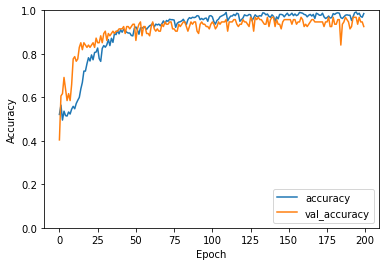

In [65]:
plt.plot(eye_history.history['accuracy'], label='accuracy')
plt.plot(eye_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')

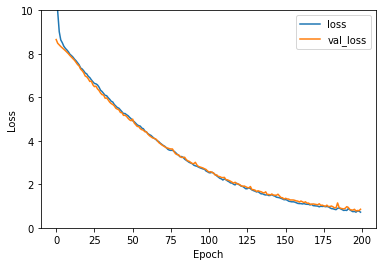

In [66]:
plt.plot(eye_history.history['loss'], label='loss')
plt.plot(eye_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 10.0])
plt.legend(loc='upper right')